<h1>This task is to understand algerian forest fire dataset using <b>Linear Regression</b> model</h1>

In [1]:
# import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
# Initializing the dataset 

DATA = "https://raw.githubusercontent.com/SAI-SRINIVASA-SUBRAMANYAM/INeuron-Classes-Assignments/main/Assignments/151022/forestfires.csv"

In [3]:
# Reading the dataset using read csv function

dataset = pd.read_csv(DATA)

In [4]:
COLUMN_DESCRIPTIONS = {
    "FFMC": "Fine Fuel Moisture Code", 
    "DMC": "Duff Moisture Code",
    "DC": "Drought Code",
    "ISI": "The ISI is a score that correlates with fire velocity spread",
    "temp": "Temperature in Celsius degrees",
    "RH": "Relative humidity in %",
    "wind": "Wind speed in km/h",
    "rain": "Outside rain in mm/m2",
    "area": "The burned area of the forest in ha"
}

In [5]:
# Dataset column description
for key, values in COLUMN_DESCRIPTIONS.items():
  print(key, "\t :", values)

FFMC 	 : Fine Fuel Moisture Code
DMC 	 : Duff Moisture Code
DC 	 : Drought Code
ISI 	 : The ISI is a score that correlates with fire velocity spread
temp 	 : Temperature in Celsius degrees
RH 	 : Relative humidity in %
wind 	 : Wind speed in km/h
rain 	 : Outside rain in mm/m2
area 	 : The burned area of the forest in ha


In [6]:
# Data preview

dataset.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [7]:
# Identifying the missing columns

dataset.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

In [8]:
# information on dataset

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [9]:
# Statistical description

dataset.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


In [10]:
# Gather information on number of rows and columns

ROWS_COUNT, COLUMNS_COUNT = dataset.shape

In [11]:
dataset.corr()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
X,1.000000,0.539548,-0.021039,-0.048384,-0.085916,0.006210,-0.051258,0.085223,0.018798,0.065387,0.063385
Y,0.539548,1.000000,-0.046308,0.007782,-0.101178,-0.024488,-0.024103,0.062221,-0.020341,0.033234,0.044873
FFMC,-0.021039,-0.046308,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122
DMC,-0.048384,0.007782,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994
DC,-0.085916,-0.101178,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383
ISI,0.006210,-0.024488,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258
temp,-0.051258,-0.024103,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844
RH,0.085223,0.062221,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519
wind,0.018798,-0.020341,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317
rain,0.065387,0.033234,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366


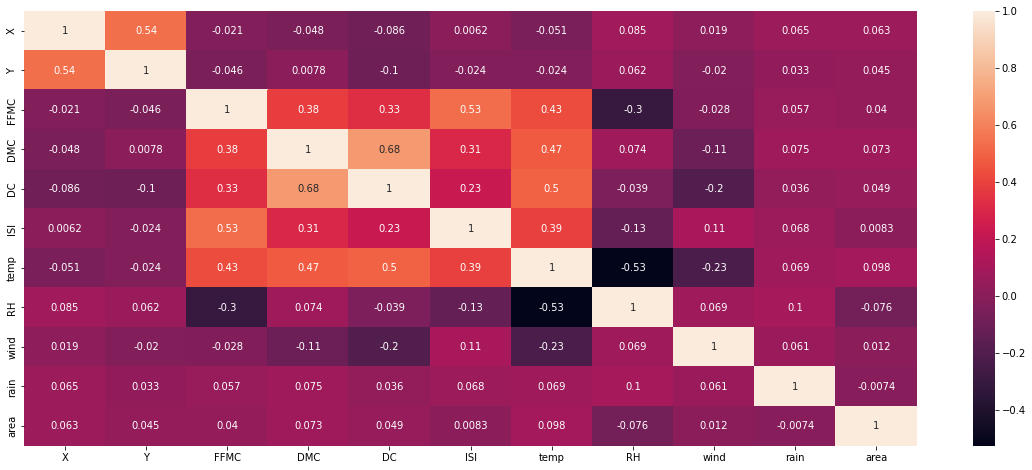

In [12]:
# Heatmap on dataset correlations

plt.subplots(figsize=(20, 8))
sns.heatmap(dataset.corr(), annot=True)

Text(0, 0.5, 'Temperature in Celsius degrees')

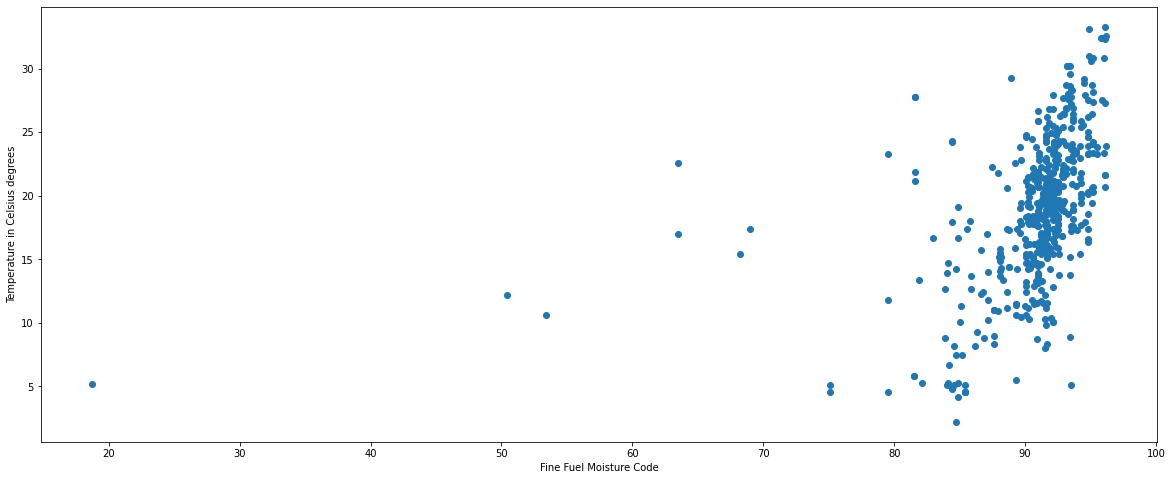

In [13]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['FFMC'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('FFMC'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


Text(0, 0.5, 'Temperature in Celsius degrees')

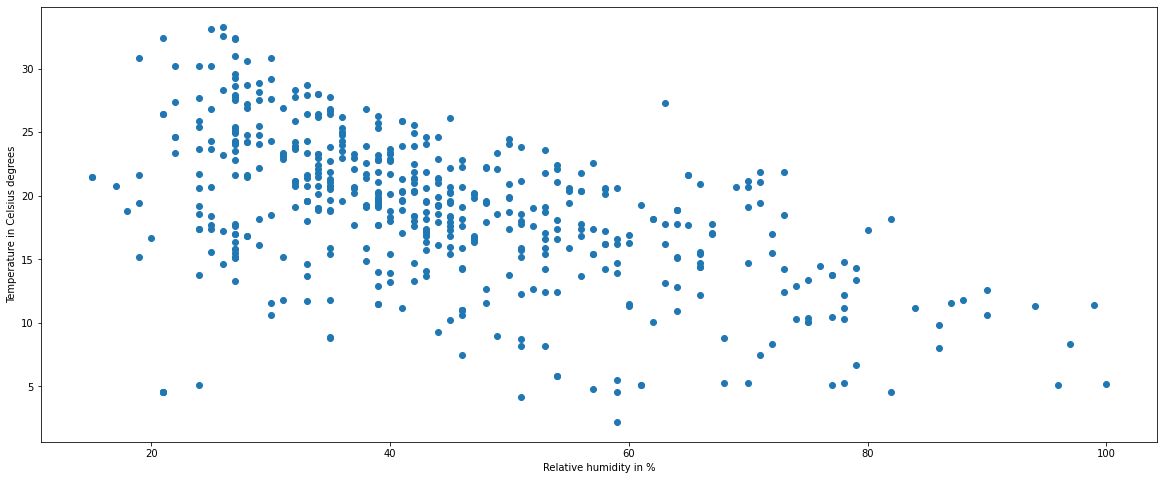

In [14]:
plt.subplots(figsize=(20, 8))
plt.scatter(dataset['RH'], dataset['temp'])
plt.xlabel(COLUMN_DESCRIPTIONS.get('RH'))
plt.ylabel(COLUMN_DESCRIPTIONS.get('temp'))


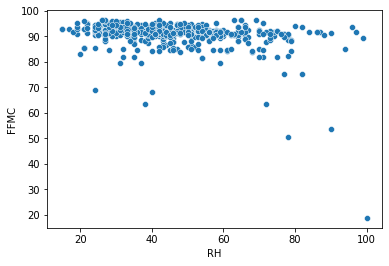

In [15]:
sns.scatterplot( x = dataset["RH"], y = dataset["FFMC"])

# independent variables are uniformly distributed

In [16]:
dataset["RH"].corr(dataset["FFMC"])

# There is no proper corelation between RH and FFMC columns

-0.30099541606173896

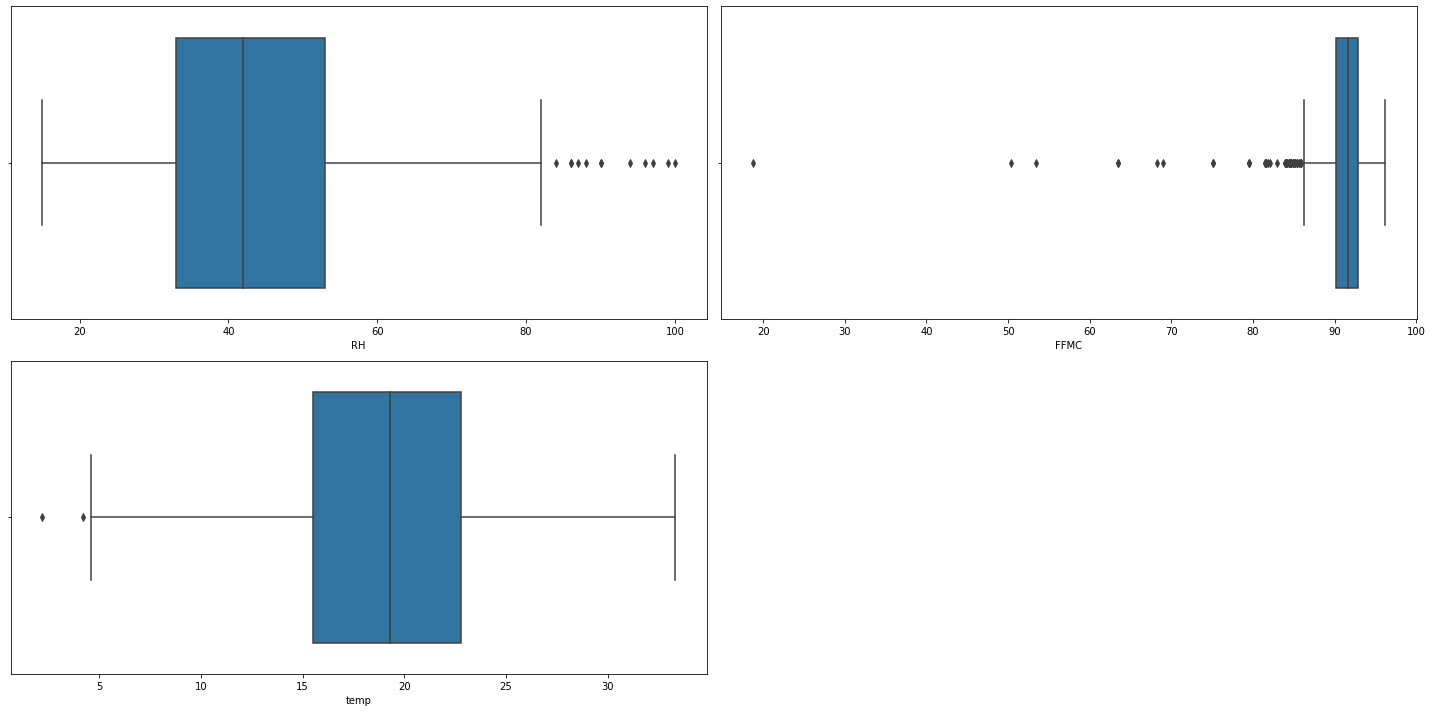

In [17]:
# Plotting box plot identifying the outliers

features = ['RH', 'FFMC', 'temp']
plt.subplots(figsize=(20, 10))
for index, feature in enumerate(features):
  plt.subplot( len(features)-1, 2, index + 1)
  sns.boxplot(x=dataset[feature])
  plt.xlabel(feature)
  plt.tight_layout()

# There are huge outliers in RH and FFMC

In [18]:
### Identifying dependent and independent feature


X = dataset[['FFMC', 'RH']]
y = dataset['temp']

In [19]:
type(X)

pandas.core.frame.DataFrame

In [20]:
type(y)

pandas.core.series.Series

Model selection

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [23]:
# Analyzing X & y train data

print(type(X_train), type(y_train), len(X_train), len(y_train))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> 346 346


In [24]:
X_train.head()

,FFMC,RH
468,91.3,27
231,93.5,27
463,75.1,82
487,95.1,34
76,86.6,43


In [25]:
y_train[:5]

468    13.3
231    27.8
463     4.6
487    26.4
76     15.7
Name: temp, dtype: float64

In [26]:
# Analyzing X & y test data

print(type(X_test), type(y_test), len(X_test), len(y_test))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'> 171 171


In [27]:
X_test.head()

,FFMC,RH
293,93.1,28
336,91.6,44
508,91.0,41
351,92.1,53
164,89.7,67


In [28]:
y_test[:5]

293    26.9
336    19.3
508    25.9
351    15.4
164    17.8
Name: temp, dtype: float64

In [29]:
## Standardize the dataset

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
# Performing fit and transformation on train and test data

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [33]:
## Model training

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
regression = LinearRegression()

In [36]:
regression.fit(X_train, y_train)

LinearRegression()

In [37]:
## print cofficient and intercept

print("Coefficient: ", regression.coef_)
print("Intercept: ", regression.intercept_)

Coefficient:  [ 1.59445459 -2.86434208]
Intercept:  19.002601156069364


In [38]:
#Prediction for test data
reg_predict = regression.predict(X_test)

In [39]:
reg_predict

array([22.74451954, 19.36260396, 19.73076764, 17.86579617, 14.57843198,
       11.42990859, 22.29385473, 19.39278217, 20.28000059, 13.49608566,
       21.16114131, 22.15908325, 22.13292179, 23.23138769, 21.70234075,
       14.23642977, 22.47894076, 19.48733356, 21.41868658, 20.27799221,
       22.70429945, 18.17159505, 11.64316446, 19.64224138, 13.13997224,
       17.29241014, 21.70234075, 17.78932017, 20.99825255, 21.61788381,
       17.29441852, 23.01813183, 17.24214816, 12.33721078, 22.83706255,
       20.54959612, 11.95900522, 11.67334267, 18.41904588, 18.41502912,
       16.99464477, 13.87228284, 19.85549724, 16.33479342, 19.39278217,
       14.58445711, 22.80085921, 19.26805257, 18.0508822 , 19.53759554,
       11.58476385, 19.33041737, 18.90189727, 24.84087482, 20.72865702,
       23.96570667, 22.74652792, 21.61185868, 21.19538884, 22.68617149,
       22.25965977, 21.95586927, 23.26558265, 19.72875926, 20.5516045 ,
       21.24972013, 19.08296654, 22.50510222, 20.60995254, 22.65

In [40]:
# Assumptions

Text(0, 0.5, 'Test predicted data')

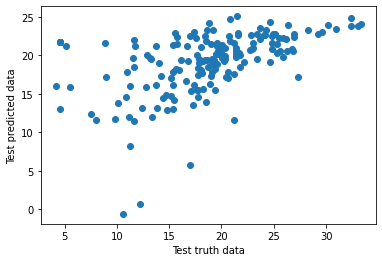

In [41]:
plt.scatter(y_test, reg_predict)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

Text(0, 0.5, 'Test predicted data')

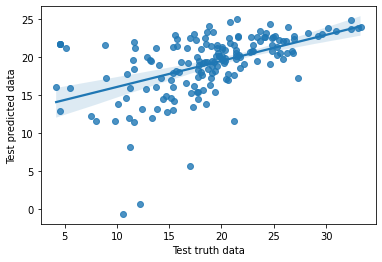

In [42]:
sns.regplot(x = y_test, y = reg_predict)
plt.xlabel('Test truth data')
plt.ylabel('Test predicted data')

In [43]:
# residuals
# Errors

residuals = y_test-reg_predict

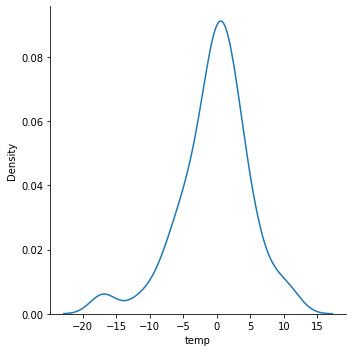

In [44]:
sns.displot(residuals, kind="kde")

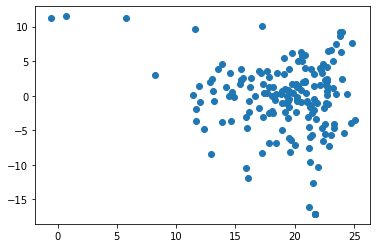

In [45]:
plt.scatter(reg_predict, residuals)

In [46]:
# Cost function analysis

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
MSE = mean_squared_error(y_test, reg_predict)
MAE = mean_squared_error(y_test, reg_predict)
print("Mean Squared Error", MSE)
print("Mean Absolute Error", MAE)
print("Root Mean Square Error", np.sqrt(MSE))

Mean Squared Error 28.17417368825381
Mean Absolute Error 28.17417368825381
Root Mean Square Error 5.307934974003903


In [48]:
# Performance metrics

In [49]:
from sklearn.metrics import r2_score
score = r2_score(y_test, reg_predict)
adj_score = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

In [50]:
print("R Squared: ", score)
print("Adjusted R Sqaured: ", adj_score)

R Squared:  0.22419836237893487
Adjusted R Sqaured:  0.21496262859773174
